# Day 1: Introduction to Python for data analysis and data visualization

This tutorial is meant for absolute beginners and it will cover the essentials to utilize python for scientific data analysis and visualization. 
In day 1 we will get familiar with Anaconda, python, Vscode and ipynb. Additionally, we will learn how to read 'excel' data and how to plot it. 

## 1. What is Python (and how can you use it)

Python is an open source (i.e. free) high-level  (i.e. easy syntax) programming language (i.e. you need a compiler and an IDE) [Ref 1](https://www.python.org/about/).

In this tutorial your compiler is provided by **Anaconda** which is some sort of bundle whose purpose is to make the Python experience as close to using a regular software as possible. 

The IDE, which stands for Integrated Development Environment, can be anything, from notepad to an iPython Notebook like the one you're seeing. Programming has become so much easier because of IDE's like **VScode**, this is what we will use. Let's spend sometime getting familiar with VSCode

## 2. Getting started with Python

All python files have **.py** extensions; however, for most of our purposes we won't need to program with .py files. We can work with **.ipynb** files like the one I'm using now. To make a new .ipynb just click on "New file", type the name of the file you want to create and include the .ipynb extension.

### 2.1 High-level structure of a code

In this case we have cells that can be code (Python) or text (Markdown). In the code cells, the main things you will find can be cathegorized as packages, variables and functions. There are also classes, but we won't get into that. 

### 2.2 The packages that we will use

In [2]:
import pandas as pd #to open csv files and similar 
import numpy as np #to manipulate vectors and any other array of numbers

import matplotlib.pyplot as plt #for plotting

plt.style.use('dark_background') #dark background, optional

### 2.3 Variables

In [45]:
number_1 = 3.14
number_2 = 2*number_1

print(number_2)

string = 'This is a string'
another_string = string[0]
print( another_string )

a = 0.1
array = np.array([1,2,3,4,5]) #this is a 1d array (vector )
print(array)

#How would you get the '2' inside array
print( array[1] )

array = np.array([ [1,2,3], [3,2,1], [a,1,1]] ) #now it is a 2d array (matrix)
print( array )


6.28
T
[1 2 3 4 5]
2
[[1.  2.  3. ]
 [3.  2.  1. ]
 [0.1 1.  1. ]]


In [46]:
#make an array of numbers from 0 to 20 spaced by 1, i.e. [0,1, 2,...,20]
linear_array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#make an array of numbers from 0 to 20 but with a 100 points, i.e. [0, 0.2,...,20]
aux = np.linspace(0, 20, 100)
print(aux)

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

## 3. Python for Data Visualization

The case study for this hour will be analysis and plotting the data from some solar cells measurements, and extraxcting the relevant information.

In the next cells we will use tkinter to interface python with our own file directories and find the directories that contain our data.

In [8]:
#This entire cell is just to locate files more easily
from tkinter import filedialog
from tkinter import *

root = Tk()
root.withdraw()

directory = filedialog.askdirectory() 
#filename = filedialog.askopenfilename()
#filename

print( directory )

2023-07-25 13:19:19.209 python[61733:19202047] +[CATransaction synchronize] called within transaction


In [47]:
import glob

filenames = glob.glob(directory+'/*') #get all the filenames in a given directory
print(filenames)

['/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample2c2light.xls', '/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample2c3light.xls', '/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample1c3ight.xls', '/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample1c1light.xls', '/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample2c4light.xls', '/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample2c1light.xls', '/Users/braulioantonio/Documents/Git/python_workshop_july2023/Data/20230720/Sample1c2light.xls']


### 3.1 Using pandas to open excel-like files

In [52]:
df = pd.read_excel(filenames[1], usecols=[0,1,2])#, sheet_name=0, header=0, names=None, index_col=None, usecols=None)
df.head()

#changing column names
#df = df.rename(columns = {'POWER' : 'Power'})
#df.head()

WARNING *** file size (55484) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [53]:
#saving the values in the columns into arrays
voltage_light = df['Voltage'].values
current_light = df['Current'].values

power_light = df['Power'].values

### 3.1 Plotting with Matplotlib

### Single plot

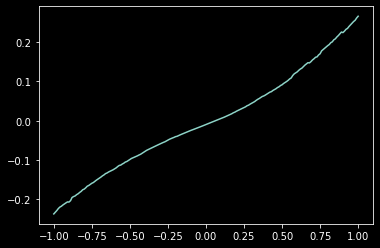

In [130]:
#plt.figure(figsize=(8,6)) #figure size

plt.plot(voltage_light, 1e3*current_light, label = 'Current')
#plt.plot(voltage_light, 1e3*power_light, label = 'Power')

# plt.hlines(0, -1, 1, color = 'gray', alpha = 0.75)

# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.legend(loc='best', fontsize=15)

# plt.title('Solar Cells Data', fontsize = 18)
# plt.xlabel('Voltage [V]', fontsize=18)
# plt.ylabel('Current [mA]', fontsize = 18)

plt.show()

## 4. Resources

### 4.1 For this tutorial
- [Pandas read csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- [Matplotlib](https://matplotlib.org/)

### 4.2 General
- [Stack overflow](https://stackoverflow.com/questions/tagged/python)
- [Geeks for geeks](https://www.geeksforgeeks.org/)
- [ChatGPT](https://openai.com/blog/chatgpt)

## Takeaways 

The three things I hope you take home with you are: 0) Have an idea of what you can do with Python 1) How to phrase questions and 2) Where to look for answers. 


# Day 2: Further data analysis

On this day we will learn how to extract relevant information from plots, how to properly portray more than one data array in the same plot and how to do multiple plots at once. 

## 5. In-depth Matplotlib: relevant examples

### 5.2 Two independent plots side to side

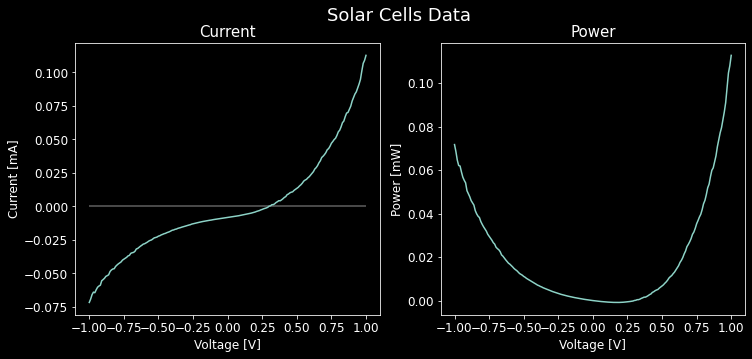

In [68]:
fig = plt.figure(figsize=(12,5) )
fig.suptitle('Solar Cells Data', fontsize = 18)

plt.subplot(1,2,1)

plt.plot(voltage_light, 1e3*current_light, label = 'Current')
plt.title('Current', fontsize=15)
plt.hlines(0, -1, 1, color = 'gray', alpha = 0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Voltage [V]', fontsize=12)
plt.ylabel('Current [mA]', fontsize = 12)

plt.subplot(1,2,2)

plt.plot(voltage_light, 1e3*power_light, label = 'Power')
plt.title('Power', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Voltage [V]', fontsize=12)
plt.ylabel('Power [mW]', fontsize = 12)


plt.show()

### 5.1 One plot, two different y axes 

<Figure size 576x432 with 0 Axes>

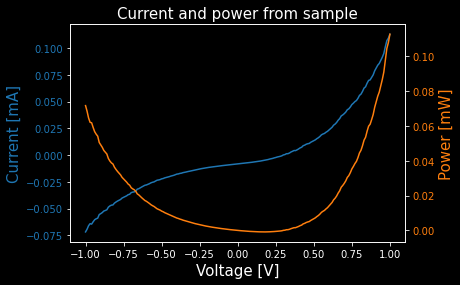

In [72]:
plt.figure(figsize=(8,6)) #figure size

fig,ax1 = plt.subplots()
ax1.plot(voltage_light, 1e3*current_light, color = '#1f77b4')
ax1.set_xlabel('Voltage [V]', fontsize = 15)
ax1.set_ylabel('Current [mA]', fontsize = 15, color = '#1f77b4')
ax1.tick_params(axis = 'y', labelcolor='#1f77b4')


ax2 = ax1.twinx()
ax2.plot(voltage_light, 1e3*power_light, color = '#ff7f0e')
ax2.set_ylabel('Power [mW]', fontsize = 15, color='#ff7f0e')
ax2.tick_params(axis = 'y', labelcolor='#ff7f0e')

plt.title('Current and power from sample', fontsize = 15)

plt.show()

### 5.3 Quickly plotting all data available

In [100]:
df = pd.DataFrame()

for filename in filenames:
    #print(filename)
    aux = pd.read_excel(filename, usecols=[0,1,2])
    aux['file'] = filename
    df = pd.concat([df, aux])

df = df.rename(columns = {'POWER' : 'Power'})
df.head()

WARNING *** file size (55480) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (55484) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (55480) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (55474) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Current,Voltage,Power,file
0,-0.000031,-1.00,0.000031,/Users/braulioantonio/Documents/Git/python_wor...
1,-0.000028,-0.99,0.000028,/Users/braulioantonio/Documents/Git/python_wor...
2,-0.000027,-0.98,0.000027,/Users/braulioantonio/Documents/Git/python_wor...
3,-0.000026,-0.97,0.000025,/Users/braulioantonio/Documents/Git/python_wor...
4,-0.000025,-0.96,0.000024,/Users/braulioantonio/Documents/Git/python_wor...


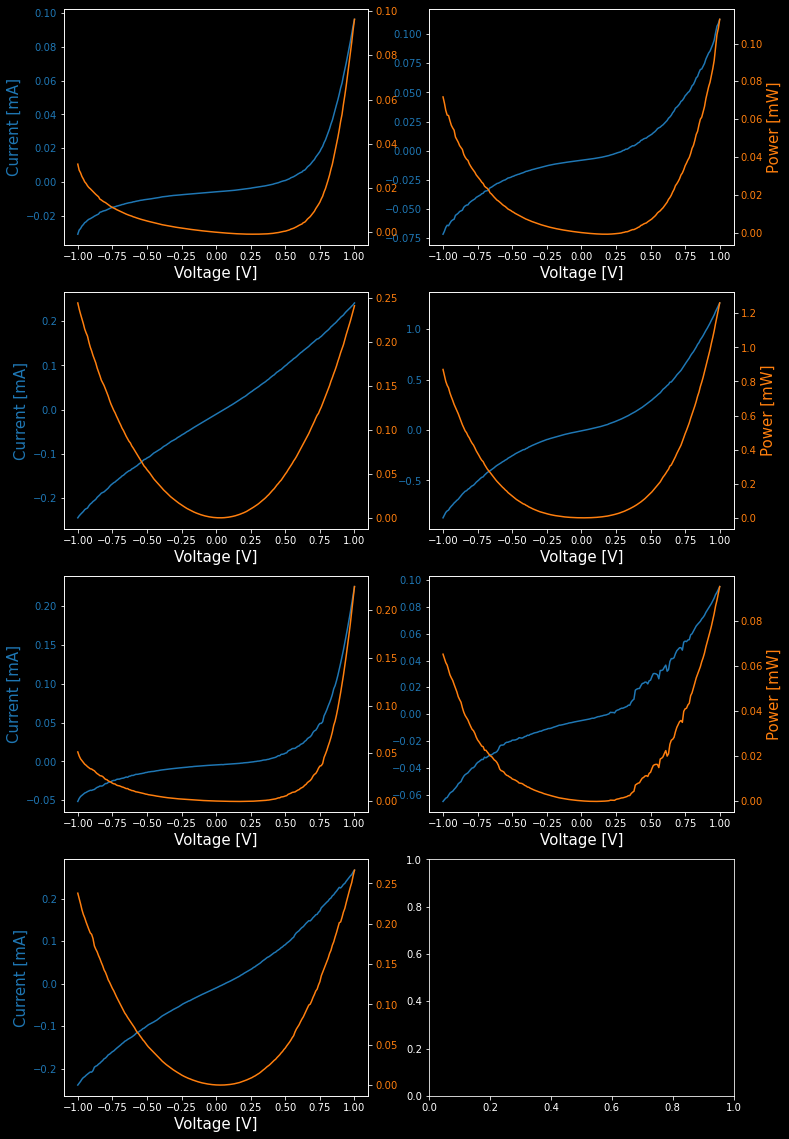

In [129]:
#plt.figure(figsize=(10,16)) #figure size
fig, axes = plt.subplots(4,2, figsize=(12,20))

for i, filename in enumerate(filenames,0):
    aux = df[df['file']==filename]

    voltage_light = aux['Voltage'].values
    current_light = aux['Current'].values
    power_light = aux['Power'].values


    #fig,ax1 = plt.subplots()
    axes[i//2,i%2].plot(voltage_light, 1e3*current_light, color = '#1f77b4')
    axes[i//2,i%2].set_xlabel('Voltage [V]', fontsize = 15)
    if i%2 == 0: axes[i//2,i%2].set_ylabel('Current [mA]', fontsize = 15, color = '#1f77b4')
    axes[i//2,i%2].tick_params(axis = 'y', labelcolor='#1f77b4')

    axes_right = axes[i//2,i%2].twinx()
    axes_right.plot(voltage_light, 1e3*power_light, color = '#ff7f0e')
    if i%2 ==1: axes_right.set_ylabel('Power [mW]', fontsize = 15, color='#ff7f0e')
    axes_right.tick_params(axis = 'y', labelcolor='#ff7f0e')

    #plt.title('Current and power from sample', fontsize = 15)

plt.show()

## 6. In-depth data analysis

In [ ]:
# find max power and max V,I respectively
#Draw square

In [134]:
df = pd.read_excel(filenames[1], usecols=[0,1,2])
df = df.rename(columns = {'POWER' : 'Power'})

WARNING *** file size (55484) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [135]:
voltage_light = df['Voltage'].values
current_light = df['Current'].values
power_light = df['Power'].values

In [141]:
idx = np.argmin(power_light)

voltage_MP = voltage_light[idx]
current_MP = current_light[idx]

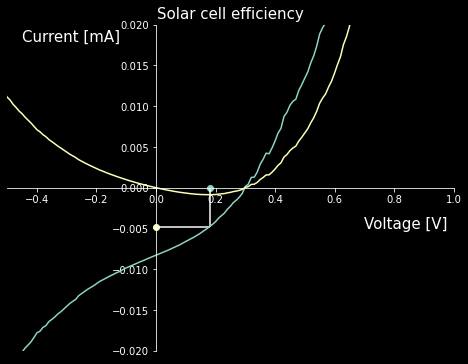

In [175]:
fig = plt.figure(figsize=(8,6)) #figure size
ax = fig.add_subplot(1,1,1)

ax.plot(voltage_light, 1e3*current_light)
ax.plot(voltage_light, 1e3*power_light)

ax.scatter(voltage_MP,0)
ax.scatter(0, 1e3*current_MP)
ax.hlines(1e3*current_MP,0,voltage_MP)
ax.vlines(voltage_MP,0,1e3*current_MP)


ax.set_ylim([-0.02, 0.02])
ax.set_xlim([-0.5, 1])

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.text(0.7, -0.005, 'Voltage [V]', fontsize=15)
plt.text(-0.45, 0.018, 'Current [mA]', fontsize=15)
plt.title('Solar cell efficiency', fontsize=15)

plt.show()